In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [90]:
import yfinance as yf

start_date = '2004-09-10'
end_date = '2016-10-09'

df2 = yf.download('GE', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [91]:
df2.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [92]:
df2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-09-10,202.966431,204.227463,201.285049,203.446823,122.272591,2704680
2004-09-13,203.446823,204.467667,202.425995,202.666183,121.803474,2851493
2004-09-14,201.765442,203.086533,201.285049,203.086533,122.056107,2302993
2004-09-15,203.086533,203.086533,201.104904,201.345108,121.009514,2091833
2004-09-16,201.645355,202.726242,201.164948,201.345108,121.009514,1576173
...,...,...,...,...,...,...
2016-10-03,176.905060,178.346237,176.544769,177.985947,163.190384,3296311
2016-10-04,178.406296,178.646484,176.845016,177.145264,162.419601,5183696
2016-10-05,177.265366,178.346237,176.544769,177.145264,162.419601,4152742


In [93]:
df = df2[['Open','Close']]
df = df.unstack()#.sort_index(level=1)

In [94]:
df = df.droplevel(0)
#df.sort_index()
df

Date
2004-09-10    202.966431
2004-09-13    203.446823
2004-09-14    201.765442
2004-09-15    203.086533
2004-09-16    201.645355
                 ...    
2016-10-03    177.985947
2016-10-04    177.145264
2016-10-05    177.145264
2016-10-06    175.764130
2016-10-07    174.623184
Length: 6084, dtype: float64

In [95]:
df.groupby(level=0).mean()

Date
2004-09-10    203.206627
2004-09-13    203.056503
2004-09-14    202.425987
2004-09-15    202.215820
2004-09-16    201.495232
                 ...    
2016-10-03    177.445503
2016-10-04    177.775780
2016-10-05    177.205315
2016-10-06    176.154449
2016-10-07    174.563141
Length: 3042, dtype: float64

In [121]:
data = df2['Close']
data

Date
2004-09-10    203.446823
2004-09-13    202.666183
2004-09-14    203.086533
2004-09-15    201.345108
2004-09-16    201.345108
                 ...    
2016-10-03    177.985947
2016-10-04    177.145264
2016-10-05    177.145264
2016-10-06    175.764130
2016-10-07    174.623184
Name: Close, Length: 3042, dtype: float64

<Axes: xlabel='Date'>

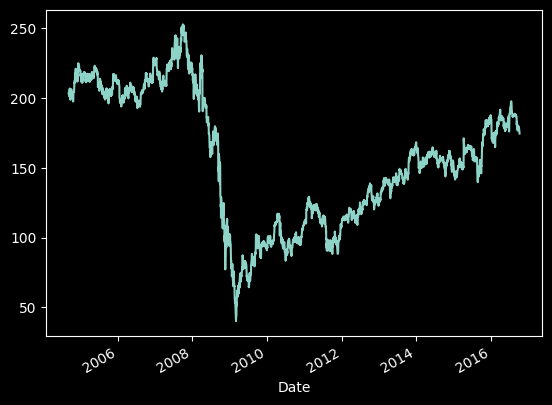

In [138]:
data.plot()

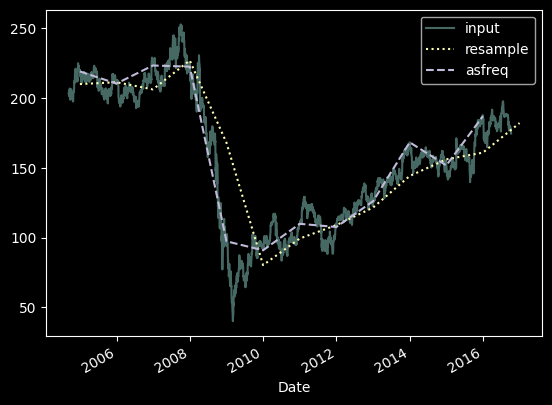

In [139]:
data.plot(alpha=0.5, style='-')
#resample = aggregation
data.resample('BA').mean().plot(style=':')
#asfreq = selection
data.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper right');

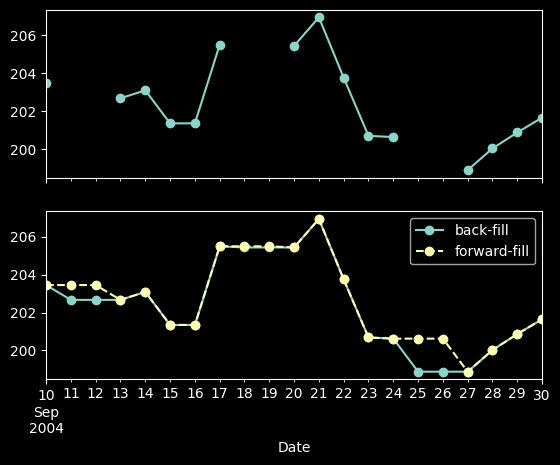

In [148]:
fig, ax = plt.subplots(2, sharex=True)
data_sample = data.iloc[:15]

data_sample.asfreq('D').plot(ax=ax[0], marker='o')
data_sample.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data_sample.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

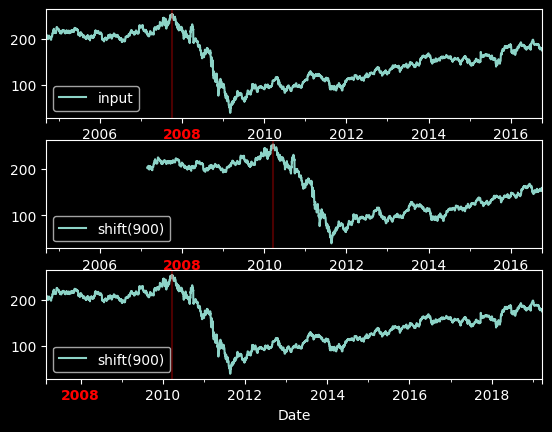

In [149]:
fig, ax = plt.subplots(3, sharey=True)

data_d = data.asfreq('D', method='pad')

data_d.plot(ax=ax[0])

#shift the data itself
data_d.shift(900).plot(ax=ax[1])

#or shift the index
data_d.shift(freq=pd.DateOffset(days=900)).plot(ax=ax[2])

#alternatively
#data_d.index = data_d.index.shift(900)
#data_d

local_max = pd.to_datetime('2007-10-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=3)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=3)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['shift(900)'], loc=3)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

In [150]:
#alternatively
data_d.index.shift(900)

DatetimeIndex(['2007-02-27', '2007-02-28', '2007-03-01', '2007-03-02',
               '2007-03-03', '2007-03-04', '2007-03-05', '2007-03-06',
               '2007-03-07', '2007-03-08',
               ...
               '2019-03-17', '2019-03-18', '2019-03-19', '2019-03-20',
               '2019-03-21', '2019-03-22', '2019-03-23', '2019-03-24',
               '2019-03-25', '2019-03-26'],
              dtype='datetime64[ns]', name='Date', length=4411, freq='D')

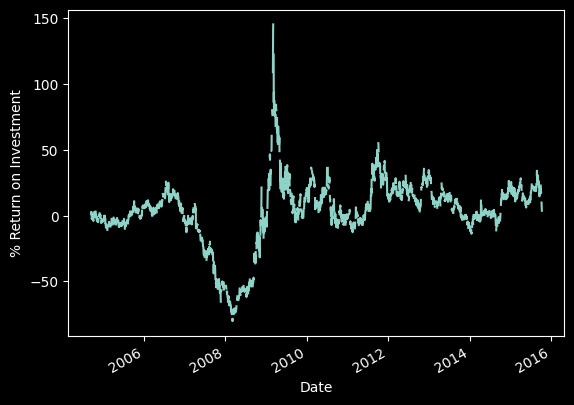

In [158]:
ROI = 100 * (data.shift(freq=pd.DateOffset(days=-365)) / data - 1)
ROI.plot()

plt.ylabel('% Return on Investment');

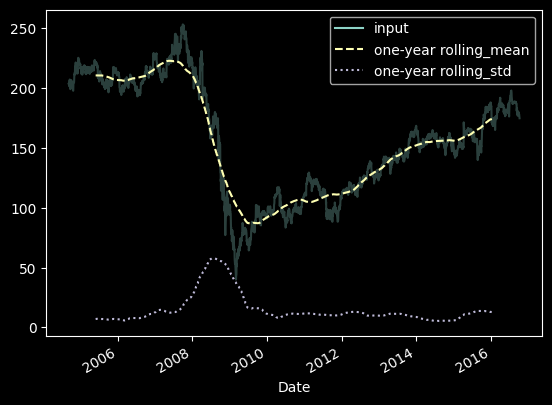

In [160]:
rolling = data.rolling(365, center=True)

data_f = pd.DataFrame({'input': data,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})

ax = data_f.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)